In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [4]:
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df1.head()
#studio vs profit? 
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
#print(df1['studio'].value_counts()['BV'])


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
df_studio = df1.groupby('studio').filter(lambda x : len(x)>=20)
#removing studios entries with less than 20 films

df_studio = df_studio.drop(columns=['domestic_gross', 'foreign_gross', 'year'])
#removing unneccecary columns

df_studio.head()


,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
6,Iron Man 2,Par.


In [7]:
df2 = pd.read_csv('tn.movie_budgets.csv.gz')

columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
for column in columns_to_convert:
    df2[column] = pd.to_numeric(df2[column].replace('[\$,]', '', regex=True), errors='coerce').astype(np.int64)
#above code changes budget and gross columns to integers

df2['profit'] = df2.worldwide_gross - df2.production_budget
#adding a profit column by combining worldwide gross and production budget. focusing on worldwide rather than domestic, 
#assuming microsoft are going for worldwide audiance 
#I'm not sure if all costs have been factored in,eg advertising. More research required


df2.sort_values(by='profit', ascending =False).head()
#can be merged to combine profit with other metrics

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [8]:
df_profit = df2.drop(columns=['id', 'release_date', 'production_budget', 'domestic_gross', 'worldwide_gross'])
df_profit.head()
#unneccecary columns removed to simplify merge 

,movie,profit
0,Avatar,2351345279
1,Pirates of the Caribbean: On Stranger Tides,635063875
2,Dark Phoenix,-200237650
3,Avengers: Age of Ultron,1072413963
4,Star Wars Ep. VIII: The Last Jedi,999721747


In [9]:
merged_df = pd.merge(df_studio, df_profit, left_on='title', right_on='movie', how='inner')
#merging data from studio and profit data frames

merged_df = merged_df.drop(columns=['movie','title'])
#movie titles not needed

df_final = merged_df.groupby('studio', as_index =False).mean()
#grouping studio releases together, then finding the average

df_final = df_final.sort_values(by='profit', ascending=False)
#sorting by profit in decending order

print(df_final)

     studio        profit
2        BV  3.310447e+08
32     Uni.  1.771931e+08
9       Fox  1.730938e+08
34  WB (NL)  1.727639e+08
28     Sony  1.696123e+08
33       WB  1.372168e+08
21     Par.  1.306514e+08
29   Strand  1.292782e+08
31      UTV  9.501160e+07
16     MBox  8.103616e+07
15      LGF  8.055740e+07
14     LG/S  6.959919e+07
25     SGem  6.687388e+07
30     TriS  6.370211e+07
35    Wein.  4.834126e+07
27      STX  4.324319e+07
7      Eros  4.225397e+07
3        CJ  3.649653e+07
8     Focus  3.605226e+07
10     FoxS  3.581295e+07
24    Rela.  2.801267e+07
19      ORF  1.781508e+07
26      SPC  1.423107e+07
0       A24  1.223359e+07
6      EOne  9.099122e+06
23     RTWC  7.531536e+06
1       BST  5.855878e+06
13      IFC  5.272377e+06
22    RAtt.  4.509280e+06
20    Osci.  1.867294e+06
4     Cohen  8.673900e+05
5     Drft. -9.795265e+05
12    Gold. -3.701818e+06
11       GK -4.417203e+06
18    Magn. -4.504840e+06
17      MNE -6.695963e+06


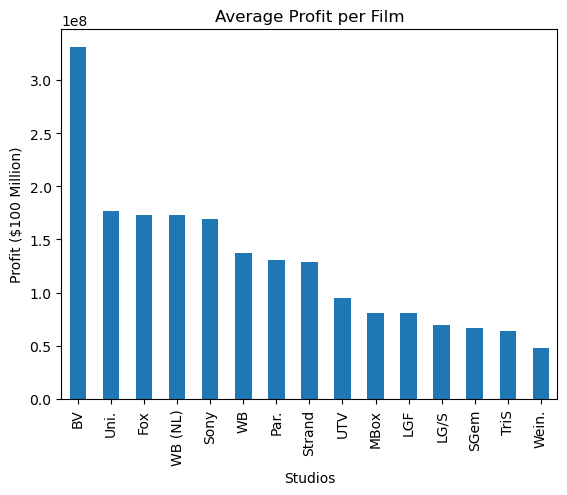

In [11]:
df_top15 = df_final.head(15)
#picking the 15 most profitable studios to highlight in bar chart

df_top15.plot(x='studio', y='profit', kind='bar', legend=False)
plt.title('Average Profit per Film')
plt.xlabel('Studios')
plt.ylabel('Profit ($100 Million)')
plt.show()

In [37]:
df3 = pd.read_csv('tmdb.movies.csv.gz')
df3.head()
#looking to change genre IDs to their names

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [150]:
#dictionary of genre_id taken from the tmdb website
genre_map = {28:"Action",
12:"Adventure",14: "Fantasy",
16:"Animation",
35:"Comedy",
80: "Crime", 99:"Documentary",
18:"Drama",
10751:"Family", 14:"Fantasy",
36:"History",
27:"Horror",
10402:"Music", 9648:"Mystery",
10749:"Romance",
878:"Science Fiction",
10770:"TV Movie",
53:"Thriller",
10752:"War",
37: "Western"}


def map_genres(genre_ids):
    return [genre_map.get(genre_id, 'Unknown') for genre_id in genre_ids]
#function to map the genre id to the name of the genre

df3['genre_names'] = df3['genre_ids'].apply(map_genres)

df_genres = df3.drop(columns = ['id', 'original_language','popularity', 'release_date',
                                'title','vote_average', 'vote_count', 'genre_ids', 'Unnamed: 0']) 

df_genres.head()

,original_title,genre_names
0,Harry Potter and the Deathly Hallows: Part 1,"[Adventure, Fantasy, Family]"
1,How to Train Your Dragon,"[Fantasy, Adventure, Animation, Family]"
2,Iron Man 2,"[Adventure, Action, Science Fiction]"
3,Toy Story,"[Animation, Comedy, Family]"
4,Inception,"[Action, Science Fiction, Adventure]"


In [151]:
#I now plan to merge genres and profit using the movie titles
merged_df2 = pd.merge(df_profit, df_genres, left_on='movie', right_on='original_title', how='inner')
merged_df2 = merged_df2.drop(columns = ['original_title', 'movie'])
merged_df2 = merged_df2.explode('genre_names')
#the function explode splits the list of strings in the column into their own individual rows

df25 = merged_df2.groupby('genre_names', as_index =False).mean()
df255 = df25.sort_values(by =['profit'], ascending = False)
df255

,genre_names,profit
2,Animation,2.558782e+08
1,Adventure,2.392808e+08
8,Fantasy,2.156837e+08
7,Family,2.094783e+08
14,Science Fiction,1.731765e+08
0,Action,1.614259e+08
3,Comedy,8.791834e+07
17,War,6.933630e+07
13,Romance,6.302028e+07
4,Crime,6.045490e+07


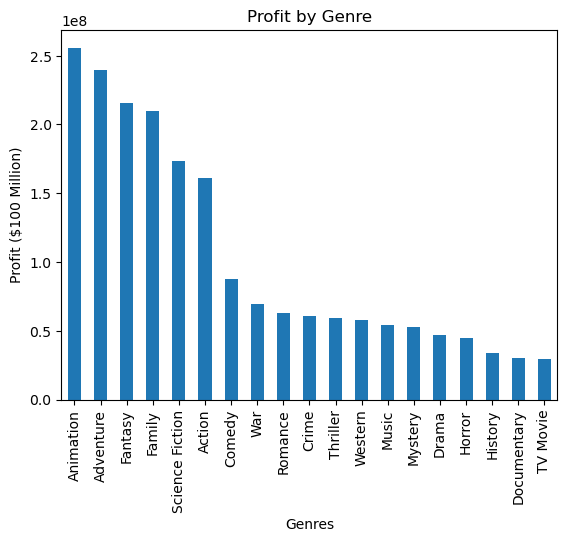

In [128]:
df255.plot(x='genre_names', y='profit', kind='bar', legend=False)
plt.title('Profit by Genre')
plt.xlabel('Genres')
plt.ylabel('Profit ($100 Million)')
plt.show()

In [139]:
df3.head()
df35 = df3.drop(columns =['id', 'original_language','popularity', 'release_date',
                                'title', 'vote_count', 'genre_ids', 'Unnamed: 0','original_title'])
df35 = df35.explode('genre_names')
df_rating = df35.groupby('genre_names', as_index = False).mean()
df_rating1 = df_rating.sort_values(by =['vote_average'], ascending = False)
df_rating1.head(20)

,genre_names,vote_average
11,Music,6.952407
5,Documentary,6.817946
9,History,6.661415
2,Animation,6.464805
17,War,6.229394
6,Drama,6.112200
7,Family,5.990479
13,Romance,5.981603
18,Western,5.955610
8,Fantasy,5.952327


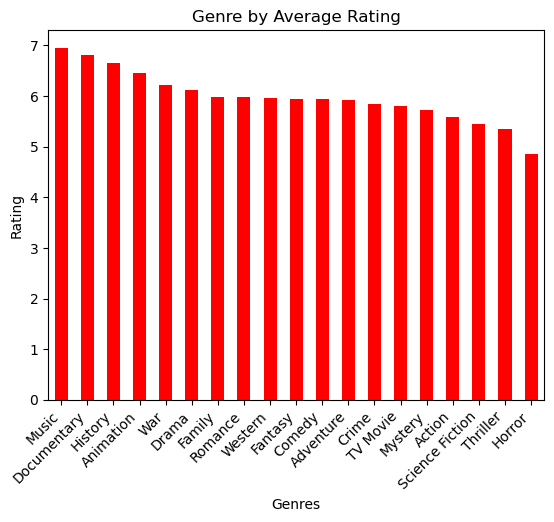

In [148]:
df_rating1.plot(x='genre_names', y='vote_average', kind='bar', legend=False, color = 'red')
plt.title('Genre by Average Rating')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

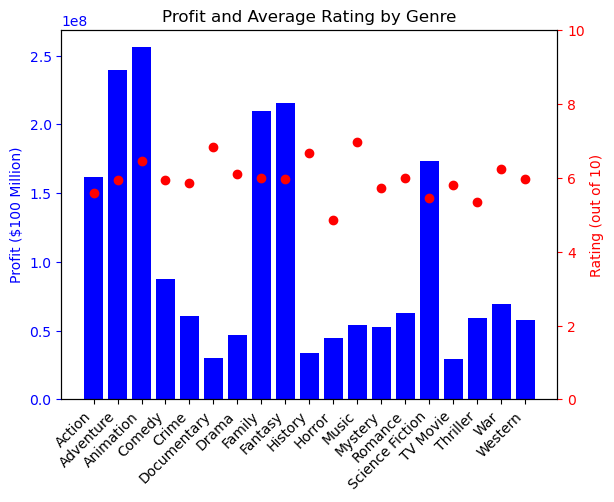

In [137]:
fig, ax1 = plt.subplots()

# Plotting Profit as a bar graph on the primary y-axis
ax1.bar(df25['genre_names'], df25['profit'], label='Profit', color='blue')
plt.xticks(rotation=45, ha='right')
ax1.set_ylabel('Profit ($100 Million)', color='blue')
ax1.tick_params('y', colors='blue')

# Creating a secondary y-axis for Average Rating
ax2 = ax1.twinx()
#scaled_rating = df_rating['vote_average'] * 2
ax2.scatter(df25['genre_names'], df_rating['vote_average'], color='red', label='Average Rating (out of 10)')
ax2.set_ylabel('Rating (out of 10)', color='red')
ax2.tick_params('y', colors='red')
ax2.set_ylim(0,10)

# Adding titles
plt.title('Profit and Average Rating by Genre')

# Display the plot
plt.show()

In [ ]:
#From the above graph, you can see there is not a direct correlation between the average profit a genre will give, 
#and it's average rating. For example, films about music have the highest ratings on average(6.95). However they make roughly 
# 119 million less than the average sci-fi film, which has a rating of (5.44). 